In [3]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

1.15.4
3.0.2
0.23.4


<b>Linear Regression with One Variable</b>
<hr/>
<ul>
<hr>
<li>線形モデルの数式：$h_\theta \left( x \right)=\theta_{0}+\theta_{1}x$</li>
<hr>
<li>コスト関数：$J \left( \theta_0, \theta_1 \right) = \frac{1}{2m}\sum\limits_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right)^{2}$</li>
<hr>
<li>モデル式のパラメーター（\(\theta_0 \)と\(\theta_1 \)）の最適な値の求め方</li>
</ul>

<img src="./images/2c9fe871ca411ba557e65ac15d55745d.png">


<b>Gradient Descent</b>
<hr/>
$\large {\theta_{j}}:={\theta_{j}}-\alpha \frac{\partial }{\partial {\theta_{j}}}J\left( \theta \right)$ 

$\large a$:learning rate

Correct: Simultaneous update {

​ $temp0 :={\theta_{0}}-\alpha \frac{\partial }{\partial {\theta_{0}}}J\left(\theta_{0}, \theta_{1} \right)$

​ $temp1 :={\theta_{1}}-\alpha \frac{\partial }{\partial {\theta_{1}}}J\left(\theta_{0}, \theta_{1} \right)$

​ ${\theta_{0}}:=temp0$

​ ${\theta_{1}}:=temp1$

}

<img src="./images/Gradient Descent.PNG" width="500">


<b><b>Linear Regression with Gradient Descent</b>

$\frac{\partial }{\partial {{\theta }{j}}}J({{\theta }{0}},{{\theta }{1}})=\frac{\partial }{\partial {{\theta }{j}}}\frac{1}{2m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}^{2}}$

<br/>

$j=0$ 时：$\frac{\partial }{\partial {{\theta }{0}}}J({{\theta }{0}},{{\theta }{1}})=\frac{1}{m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}}$

$j=1$ 时：$\frac{\partial }{\partial {{\theta }{1}}}J({{\theta }{0}},{{\theta }{1}})=\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$


So, Repeat until convergence {

​ ${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$

​ ${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$

​ }

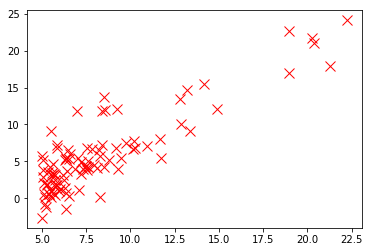

In [14]:
data = np.loadtxt("./ex1/ex1data1.txt", delimiter=",", skiprows=1)
plt.plot(data[:,0], data[:,1], 'rx', markersize=10)

In [15]:
df = pd.read_csv("./ex1/ex1data1.txt", names=["population", "profit"])#读取数据并赋予列名
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


$\large J(w_{0}, w_{1}) = \frac{1}{2m} \sum_{i=1}^m((w_{1}x+w_{0}) - y_{i})^{2}$

In [16]:
#コスト関数
def cost(w0, w1, data):
    cost = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        cost += ((w1 * x + w0) - y) ** 2
    cost = cost / (len(data) * 2)
    return cost

print(cost(0,0,data))

30.794957855345817


<ul>
<li>最急降下法の数式：<br><br>
\(\large w_{0} := w_{0} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i}) \)<br><br>
\(\large w_{1} := w_{1} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i})\cdot x_{i} \)
</li>
<hr>
</ul>


In [17]:
#最急降下法
def gradientDesent(w0_in, w1_in, data, alpha):
    w0_gradient = 0
    w1_gradient = 0
    m = float(len(data))
    
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        w0_gradient += (1/m) * (((w1_in * x) + w0_in) - y)
        w1_gradient += (1/m) * ((((w1_in * x) + w0_in) - y) * x)
    
    w0_out = w0_in - (alpha * w0_gradient)
    w1_out = w1_in - (alpha * w1_gradient)
    return w0_out, w1_out
print(gradientDesent(0,0, data, 0.1))

(0.5716709375000003, 6.488968277207291)


In [18]:
def run(data, iterations=1000, init_w0=0, init_w1=0, alpha=0.01):
    w0 = init_w0
    w1 = init_w1
    for i in range(iterations):
        wo, w1 = gradientDesent(w0, w1, np.array(data), alpha)
    return w0, w1

print(run(data, 5000))

(0, 0.7926618060356753)


<b>Linear Regression with Multiple Variables</b>
<hr/>

$\large h_{\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$，


$\large ⇒ \begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}$


<b>Gradient Descent for Multiple Variables</b>
<hr/>
$\large J\left( {\theta_{0}},{\theta_{1}}...{\theta_{n}} \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( h_{\theta} \left({x}^{\left( i \right)} \right)-{y}^{\left( i \right)} \right)}^{2}}}$ 


$\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}$

<b>Normal Equation</b>
<hr/>

$\theta ={{\left( {X^T}X \right)}^{-1}}{X^{T}}y$ 

<img src="./images/333df5f11086fee19c4fb81bc34d5125.png">
